# Title

Deep Fake Image and Video Detection using CNN's and RNN's

# Problem Statement

DeepFake is composed from Deep Learning and Fake and means taking one person from an image or video and replacing with someone else likeness using technology such as Deep Artificial Neural Networks. Large companies like Google invest very much in fighting the DeepFake, this including release of large datasets to help training models to counter this threat.The phenomen invades rapidly the film industry and threatens to compromise news agencies. Large digital companies, including content providers and social platforms are in the frontrun of fighting Deep Fakes. GANs that generate DeepFakes becomes better every day and, of course, if you include in a new GAN model all the information we collected until now how to combat various existent models, we create a model that cannot be beatten by the existing ones.

First we will work on detecting faces that were forged and we will work on developing a model to detect videos.

# DeepFake Image detection

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
! pip install kaggle

In [3]:

! mkdir ~/.kaggle

In [4]:
! cp drive/MyDrive/kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c deepfake-detection-challenge

100% 4.12G/4.13G [00:30<00:00, 91.8MB/s]
100% 4.13G/4.13G [00:30<00:00, 146MB/s] 


In [7]:
!unzip /content/deepfake-detection-challenge

Archive:  /content/deepfake-detection-challenge.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp4  
  inflating: test_videos/bkt

In [8]:
!kaggle datasets download -d dagnelies/deepfake-faces

 98% 425M/433M [00:02<00:00, 159MB/s]
100% 433M/433M [00:02<00:00, 153MB/s]


In [9]:
!unzip /content/deepfake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: faces_224/yppwksjuui.jpg  
  inflating: faces_224/yppybofyww.jpg  
  inflating: faces_224/ypqjxdwawy.jpg  
  inflating: faces_224/ypqsxalhkw.jpg  
  inflating: faces_224/ypqxbbydxe.jpg  
  inflating: faces_224/ypqzrivawi.jpg  
  inflating: faces_224/yprdarrkit.jpg  
  inflating: faces_224/yprhthcacq.jpg  
  inflating: faces_224/yprmkhffdi.jpg  
  inflating: faces_224/yprnmqkhga.jpg  
  inflating: faces_224/yprqkgcoid.jpg  
  inflating: faces_224/yprsoygtjn.jpg  
  inflating: faces_224/yprxcbpmaj.jpg  
  inflating: faces_224/yprxtgidkk.jpg  
  inflating: faces_224/ypsbicsrsf.jpg  
  inflating: faces_224/ypsfvpanpn.jpg  
  inflating: faces_224/ypsgzbgbaz.jpg  
  inflating: faces_224/ypskfnxajx.jpg  
  inflating: faces_224/ypskxfumwo.jpg  
  inflating: faces_224/ypslvqfsrd.jpg  
  inflating: faces_224/ypsmruzzyt.jpg  
  inflating: faces_224/ypsqgodnrn.jpg  
  inflating: faces_224/ypsydrqqsl.jpg  
  inflating: faces_224/yptcha

This dataset contains faces extracted from deepfake-detection-challenge. All images were of size 224x224.

Due to memory issue we will only use a sample of the entire dataset for prediction.

## Importing Required libraries

In [10]:
!pip install -U --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [11]:
import sys
import sklearn
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np

import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import pyplot as plt

In [12]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [13]:
tf.__version__

'2.15.0'

In [14]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Data Visualisation

In [15]:
import os

def get_data():
    return pd.read_csv('/content/metadata.csv')

In [16]:
meta=get_data()
meta.head()

videoname  original_width  original_height label        original
0  aznyksihgl.mp4             129              129  FAKE  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129  FAKE  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217  FAKE  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186  FAKE  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155  FAKE  pluadmqqta.mp4

In [17]:
meta.shape

(95634, 5)

In [18]:
len(meta[meta.label=='FAKE']),len(meta[meta.label=='REAL'])

(79341, 16293)

In [19]:
real_df = meta[meta["label"] == "REAL"]
fake_df = meta[meta["label"] == "FAKE"]
sample_size = 8000

real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

As mentioned instead of using 95k images we will only use 16000 images.

In [20]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [21]:
Train_set.shape,Val_set.shape,Test_set.shape

((8960, 5), (3840, 5), (3200, 5))

In [22]:
y = dict()

y[0] = []
y[1] = []

for set_name in (np.array(Train_set['label']), np.array(Val_set['label']), np.array(Test_set['label'])):
    y[0].append(np.sum(set_name == 'REAL'))
    y[1].append(np.sum(set_name == 'FAKE'))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='REAL',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='FAKE',
    marker=dict(color='#ff3300'),
    opacity=0.7
)

data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)

fig = go.Figure(data, layout)
iplot(fig)

The original image dataset were biased with more fake images than real since we are taking a sample of it its better to take equal proportion of real and fake images.

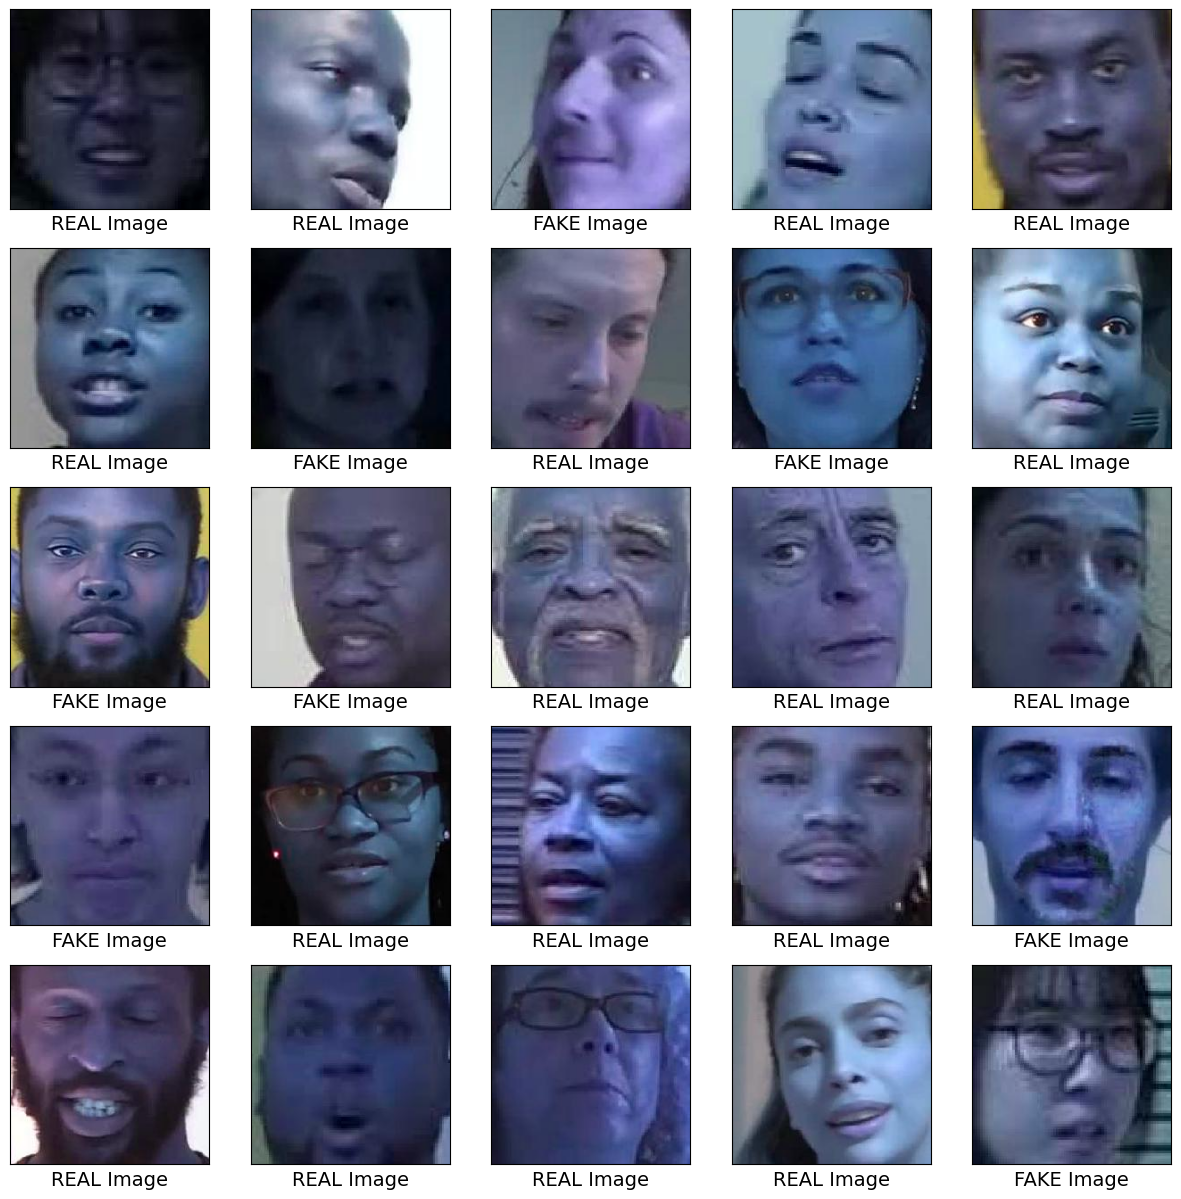

In [23]:
plt.figure(figsize=(15,15))
for cur,i in enumerate(Train_set.index[25:50]):
    plt.subplot(5,5,cur+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(cv2.imread('/content/faces_224/'+Train_set.loc[i,'videoname'][:-4]+'.jpg'))

    if(Train_set.loc[i,'label']=='FAKE'):
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')

plt.show()

## Modelling

Before jumping to use pretrained model lets develop some base line model to test how our pretrained model outperforms.

### Custom CNN Architecture

In [24]:
def retreive_dataset(set_name):
    images,labels=[],[]
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        images.append(cv2.imread('/content/faces_224/'+img[:-4]+'.jpg'))
        if(imclass=='FAKE'):
            labels.append(1)
        else:
            labels.append(0)

    return np.array(images),np.array(labels)

In [25]:
X_train,y_train=retreive_dataset(Train_set)
X_val,y_val=retreive_dataset(Val_set)
X_test,y_test=retreive_dataset(Test_set)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Learning Rate Scheduling
def schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_schedule = LearningRateScheduler(schedule)

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


In [27]:
from tensorflow.keras.optimizers import AdamW
# Create an instance of AdamW optimizer
optimizer = AdamW(learning_rate=1e-3, weight_decay=1e-4)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [28]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/5
70/70 [==============================] - 34s 293ms/step - loss: 2.5329 - accuracy: 0.5473 - val_loss: 0.6936 - val_accuracy: 0.5917
Epoch 2/5
70/70 [==============================] - 19s 276ms/step - loss: 0.6737 - accuracy: 0.5962 - val_loss: 0.6835 - val_accuracy: 0.5974
Epoch 3/5
70/70 [==============================] - 19s 278ms/step - loss: 0.6358 - accuracy: 0.6385 - val_loss: 0.6650 - val_accuracy: 0.6180
Epoch 4/5
70/70 [==============================] - 20s 280ms/step - loss: 0.6147 - accuracy: 0.6540 - val_loss: 0.6811 - val_accuracy: 0.5992
Epoch 5/5
70/70 [==============================] - 20s 282ms/step - loss: 0.5925 - accuracy: 0.6758 - val_loss: 0.6227 - val_accuracy: 0.6552


In [29]:
score = model.evaluate(X_test, y_test)

100/100 [==============================] - 3s 18ms/step - loss: 0.6145 - accuracy: 0.6522


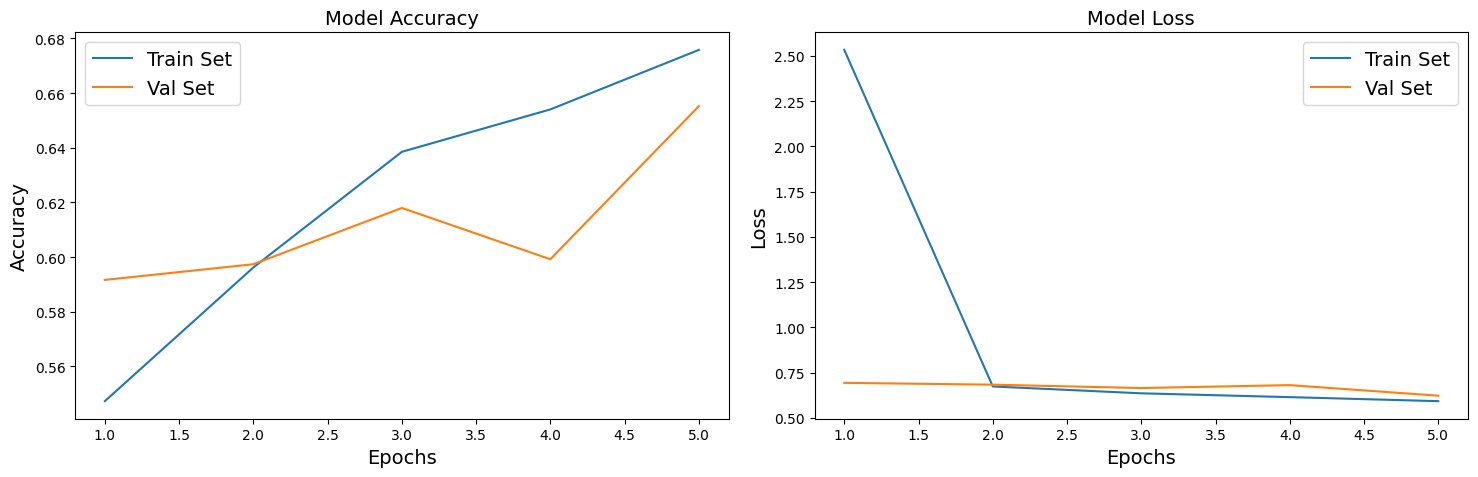

In [30]:
# plot model performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

A baseline score of 64% is good to go let's finetune some pretrained model

# Pretrained Models for Transfer Learning

Here i used Xception model for fine-tuning feel free to try the performance of other pretrained models.

All three datasets contain individual images. We need to batch them, but for this we first need to ensure they all have the same size, or else batching will not work. We can use a `Resizing` layer for this. We must also call the `tf.keras.applications.xception.preprocess_input()` function to preprocess the images appropriately for the Xception model. We will also add shuffling and prefetching to the training dataset.

In [31]:
train_set_raw=tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_set_raw=tf.data.Dataset.from_tensor_slices((X_val,y_val))
test_set_raw=tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [57]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import InceptionV3

In [58]:
tf.keras.backend.clear_session()  # extra code – resets layer name counter

batch_size = 32
preprocess = tf.keras.applications.inception_v3.preprocess_input  # Use preprocess function for EfficientNet
train_set = train_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)

Let's take a look again at the first 9 images from the validation set: they're all with values ranging from -1 to 1:

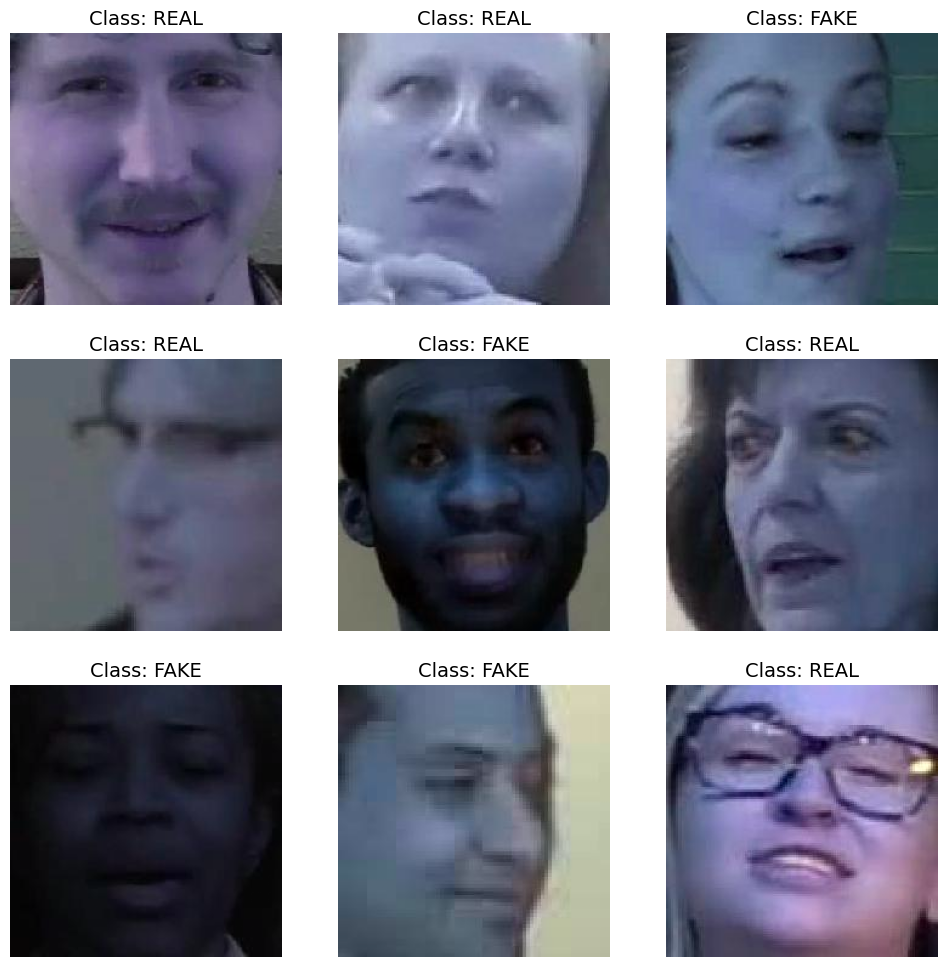

In [59]:
# extra code – displays the first 9 images in the first batch of valid_set

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow((X_batch[index] + 1) / 2)  # rescale to 0–1 for imshow()
        if(y_batch[index]==1):
            classt='FAKE'
        else:
            classt='REAL'
        plt.title(f"Class: {classt}")
        plt.axis("off")

plt.show()

In [60]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

Try running the following cell multiple times to see different random data augmentations:

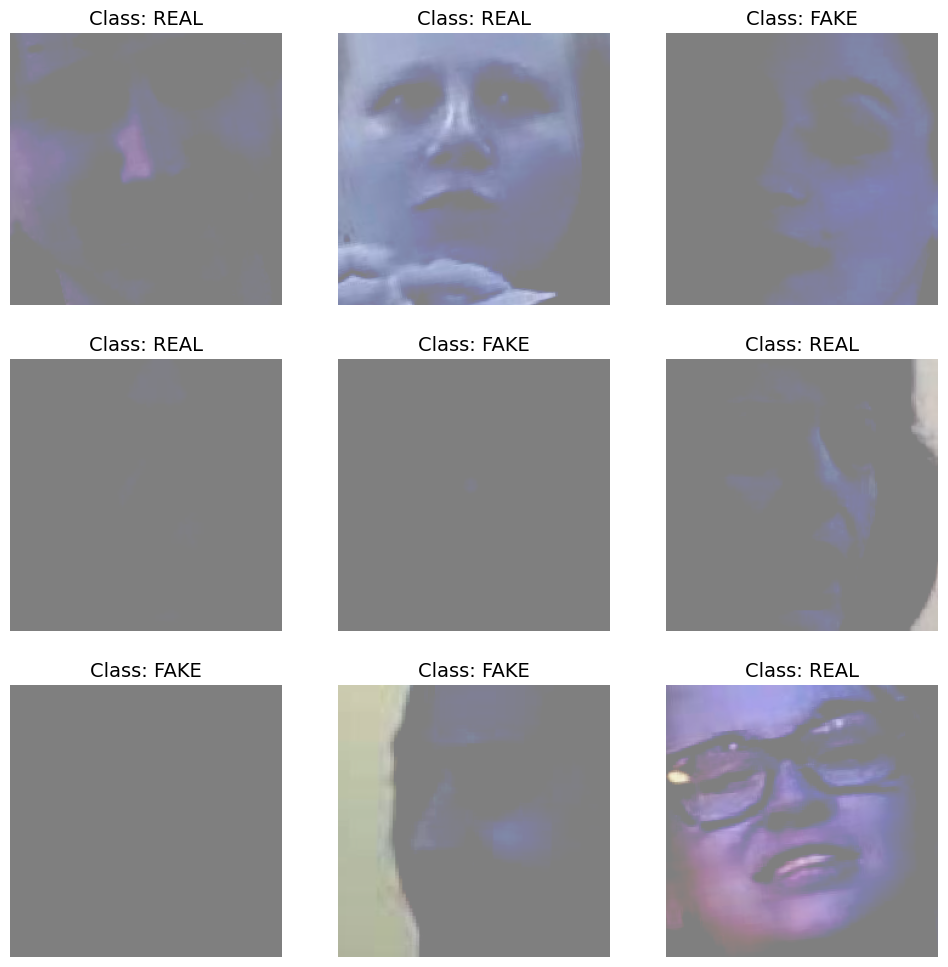

In [61]:
# extra code – displays the same first 9 images, after augmentation

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    X_batch_augmented = data_augmentation(X_batch, training=True)
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        # We must rescale the images to the 0-1 range for imshow(), and also
        # clip the result to that range, because data augmentation may
        # make some values go out of bounds (e.g., RandomContrast in this case).
        plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
        if(y_batch[index]==1):
            classt='FAKE'
        else:
            classt='REAL'
        plt.title(f"Class: {classt}")
        plt.axis("off")

plt.show()

Now let's load the pretrained model, without its top layers, and replace them with our own task

In [37]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
base_model = EfficientNetB3(weights="imagenet", include_top=False)
#base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation="sigmoid")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

16705208/16705208 [==============================] - 0s 0us/step


In [38]:
for layer in base_model.layers:
    layer.trainable = False

Let's train the model for a few epochs, while keeping the base model weights fixed:

In [39]:
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
optimizer = AdamW(learning_rate=1e-3, weight_decay=1e-4)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3
280/280 [==============================] - 33s 95ms/step - loss: 0.6605 - accuracy: 0.6019 - val_loss: 0.6409 - val_accuracy: 0.6346
Epoch 2/3
280/280 [==============================] - 24s 84ms/step - loss: 0.6322 - accuracy: 0.6424 - val_loss: 0.6272 - val_accuracy: 0.6479
Epoch 3/3
280/280 [==============================] - 24s 85ms/step - loss: 0.6174 - accuracy: 0.6656 - val_loss: 0.6191 - val_accuracy: 0.6599


In [40]:
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132)):
    for idx in indices:
        print(f"{idx:3}: {base_model.layers[idx].name:22}", end="")
    print()

  0: input_1                33: block2b_expand_bn      66: block3b_activation     99: block4b_se_expand     
  1: rescaling              34: block2b_expand_activation 67: block3b_se_squeeze    100: block4b_se_excite     
  2: normalization          35: block2b_dwconv         68: block3b_se_reshape    101: block4b_project_conv  
  3: rescaling_1            36: block2b_bn             69: block3b_se_reduce     102: block4b_project_bn    
  4: stem_conv_pad          37: block2b_activation     70: block3b_se_expand     103: block4b_drop          
  5: stem_conv              38: block2b_se_squeeze     71: block3b_se_excite     104: block4b_add           
  6: stem_bn                39: block2b_se_reshape     72: block3b_project_conv  105: block4c_expand_conv   
  7: stem_activation        40: block2b_se_reduce      73: block3b_project_bn    106: block4c_expand_bn     
  8: block1a_dwconv         41: block2b_se_expand      74: block3b_drop          107: block4c_expand_activation
  9: block1a_

In [41]:
model.evaluate(test_set)

100/100 [==============================] - 6s 56ms/step - loss: 0.6125 - accuracy: 0.6603


[0.6124823093414307, 0.6603124737739563]

Now with the finetuning the top layers of xception model the model performance jumps to 63.8%

Now that the weights of our new top layers are not too bad, we can make the top part of the base model trainable again, and continue training, but with a lower learning rate:

In [42]:
for layer in base_model.layers[56:]:
    layer.trainable = True
#optimizer = AdamW(learning_rate=1e-3, weight_decay=1e-4)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
280/280 [==============================] - 78s 171ms/step - loss: 0.5736 - accuracy: 0.7027 - val_loss: 1.0157 - val_accuracy: 0.6766
Epoch 2/10
280/280 [==============================] - 47s 168ms/step - loss: 0.4087 - accuracy: 0.8100 - val_loss: 0.4449 - val_accuracy: 0.7875
Epoch 3/10
280/280 [==============================] - 48s 170ms/step - loss: 0.3001 - accuracy: 0.8660 - val_loss: 0.4573 - val_accuracy: 0.7911
Epoch 4/10
280/280 [==============================] - 48s 170ms/step - loss: 0.2257 - accuracy: 0.9078 - val_loss: 0.8417 - val_accuracy: 0.7312
Epoch 5/10
280/280 [==============================] - 48s 170ms/step - loss: 0.1737 - accuracy: 0.9296 - val_loss: 0.6628 - val_accuracy: 0.7771
Epoch 6/10
280/280 [==============================] - 48s 170ms/step - loss: 0.1553 - accuracy: 0.9362 - val_loss: 0.5363 - val_accuracy: 0.8219
Epoch 7/10
280/280 [==============================] - 48s 170ms/step - loss: 0.1162 - accuracy: 0.9566 - val_loss: 0.6174 - val_ac

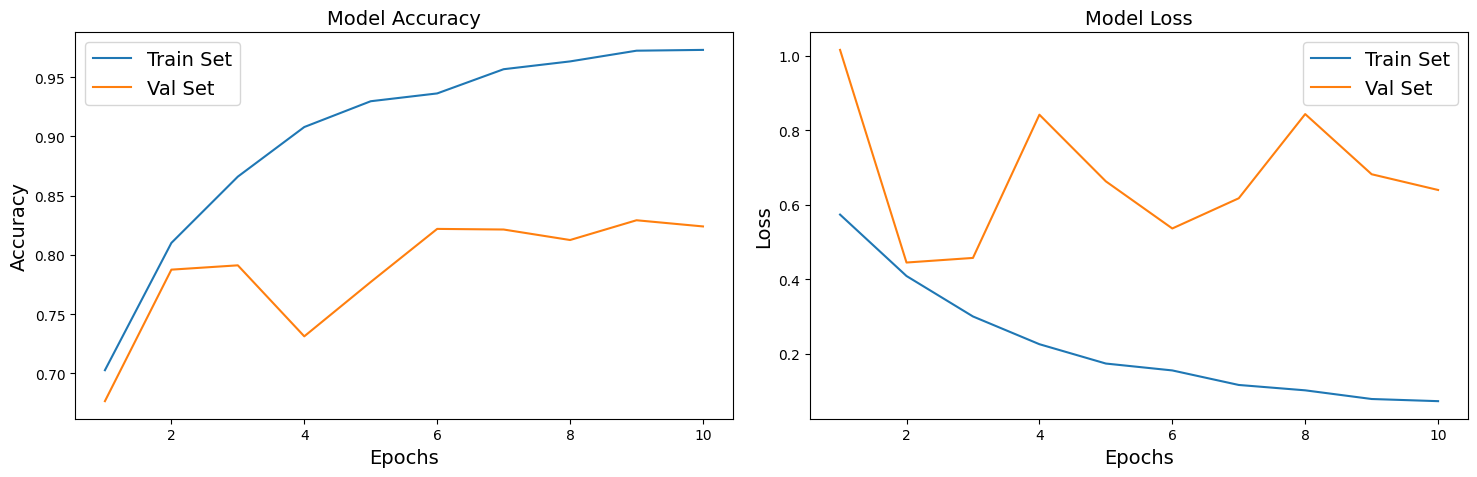

In [43]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [44]:
model.evaluate(test_set)

100/100 [==============================] - 6s 58ms/step - loss: 0.5673 - accuracy: 0.8281


[0.5673117637634277, 0.828125]

The model accuracy finally reaches to 81.9%

In [45]:
model.save('xception_deepfake_image.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



# Add Explainability to the model

Lets try to interpret the trained model on how it finds a image FAKE

In [46]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=e04acfaf25ee7c26e65dcf8a10e10b341d1834ad4c06128380f5917da2c1306c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [47]:
!pip install fastapi kaleido python-multipart uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [48]:
!pip install --upgrade scipy

In [49]:
!pip uninstall -y lime scikit-image scipy
!pip install lime scikit-image scipy

Found existing installation: lime 0.2.0.1
Uninstalling lime-0.2.0.1:
  Successfully uninstalled lime-0.2.0.1
Found existing installation: scikit-image 0.19.3
Uninstalling scikit-image-0.19.3:
  Successfully uninstalled scikit-image-0.19.3
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
  Using cached lime-0.2.0.1-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 45.5 MB/s eta 0:00:00


In [50]:
!pip install cupy-cuda110

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 19.1 MB/s eta 0:00:00


In [65]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

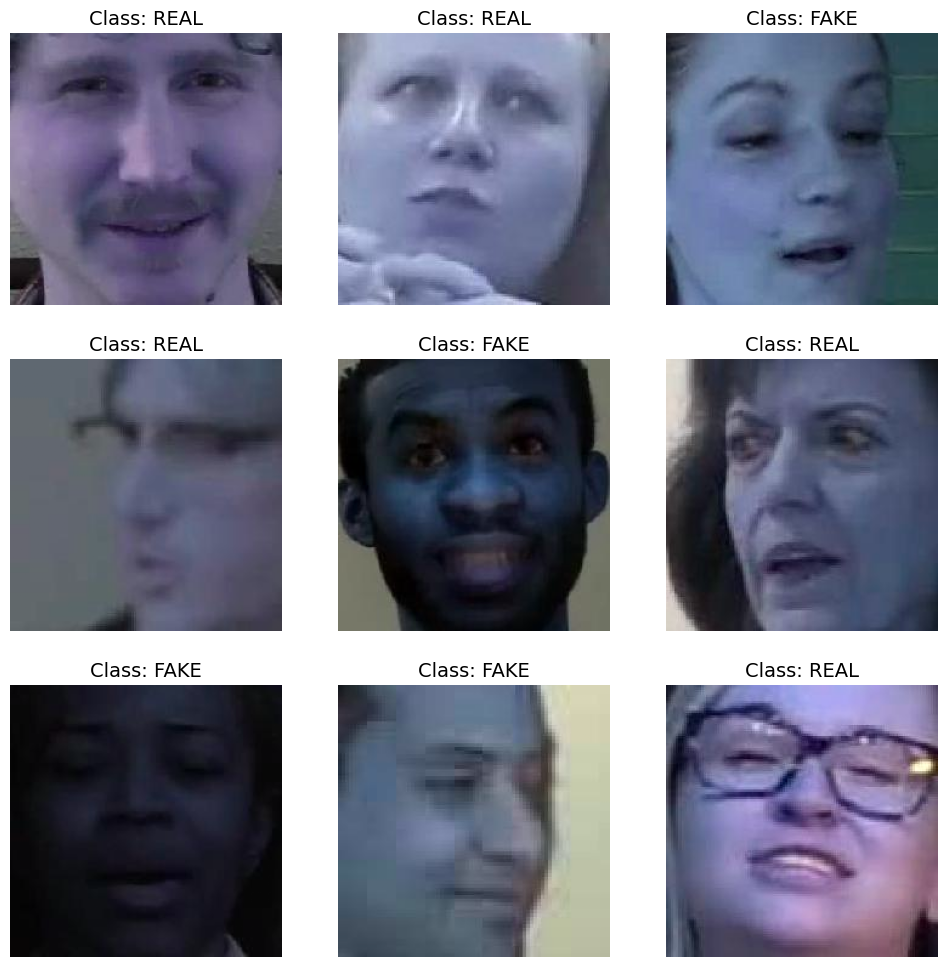

In [66]:
plt.figure(figsize=(12, 12))

for x, y in valid_set.take(1):
   for index in range(9):
      plt.subplot(3, 3, index + 1)
      plt.imshow((x[index] + 1) / 2)  # rescale to 0–1 for imshow()
      if(y[index]==1):
        classt='FAKE'
      else:
       classt='REAL'
      plt.title(f"Class: {classt}")
      plt.axis("off")

plt.show()

In [67]:
test_data=x[2,:,:,:]
test_data.shape

TensorShape([224, 224, 3])

In [73]:
explanation = explainer.explain_instance(test_data.numpy(), model.predict, top_labels=3, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


(-0.5, 223.5, 223.5, -0.5)

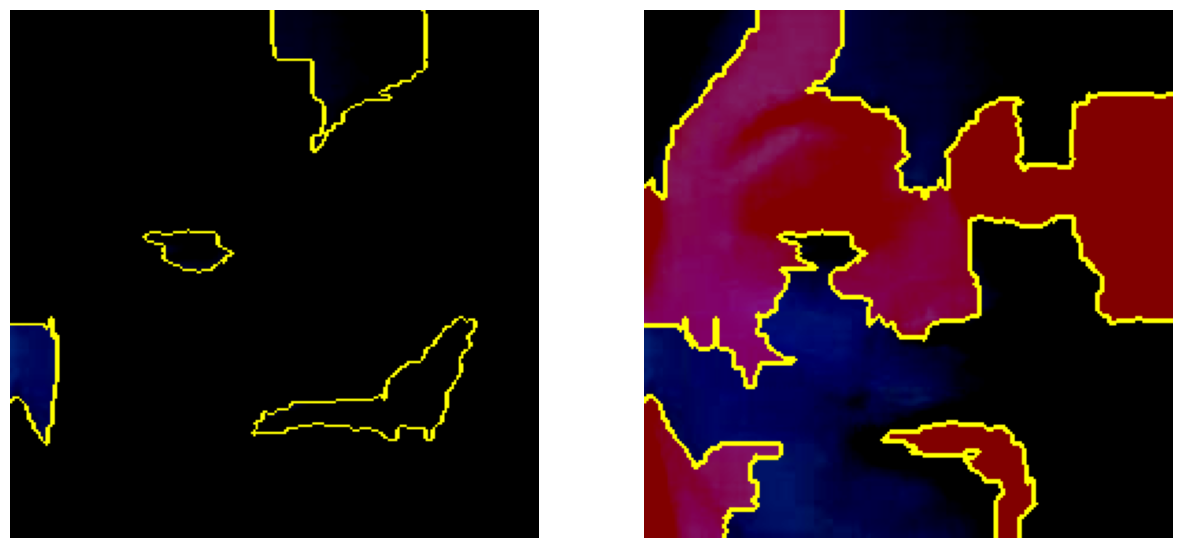

In [76]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

# Reference and Thanks to

https://keras.io/examples/vision/video_classification/

https://www.kaggle.com/code/gpreda/deepfake-starter-kit

https://www.kaggle.com/code/robikscube/kaggle-deepfake-detection-introduction

https://www.kaggle.com/code/humananalog/binary-image-classifier-training-demo

https://www.kaggle.com/datasets/dagnelies/deepfake-faces

**Please UPVOTE if you found the notebook useful**